<a href="https://colab.research.google.com/github/eispoohw/CS493-Math-Methods-in-ML/blob/main/lab7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [1]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [2]:
a = torch.FloatTensor(3, 4)
b = torch.FloatTensor(12)
c = b.view(2, 2, 3)

a[:, 0]

tensor([5.2362e-35,        nan, 4.3066e+21])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [3]:
a = torch.FloatTensor(5, 2)
b = torch.FloatTensor(1, 10)
c = b.view(5, 2)

print(f"a + c\t{a.add(c)}\n")
print(f"a - c\t{a.sub(c)}\n")
print(f"a * c\t{a.mul(c)}\n")
print(f"a / c\t{a.div(c)}\n")

a + c	tensor([[1.0473e-34, 0.0000e+00],
        [1.0089e-43, 0.0000e+00],
        [       nan, 0.0000e+00],
        [2.7022e-14, 7.2846e-06],
        [4.1398e-19, 6.7476e-12]])

a - c	tensor([[7.3468e-40, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [       nan, 0.0000e+00],
        [5.5338e-16, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])

a * c	tensor([[0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [       nan, 0.0000e+00],
        [1.8248e-28, 1.3266e-11],
        [4.2845e-38, 1.1383e-23]])

a / c	tensor([[1.0000,    nan],
        [1.0000,    nan],
        [   nan,    nan],
        [1.0418, 1.0000],
        [1.0000, 1.0000]])



### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

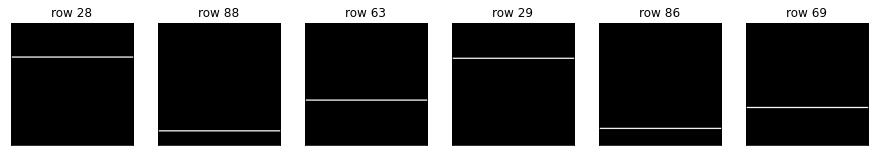

In [4]:
import random

images = torch.IntTensor(100, 200, 200, 3).zero_()
white_dot = torch.IntTensor([255, 255, 255])

for i in range(images.shape[0]):
    images[i, i*2:i*2+2, :] = 255

fig = plt.figure(figsize=(18, 5))

for i in range(1, 7):
    sub = fig.add_subplot(1, 7, i)
    idx = random.randint(0, 99)
    sub.imshow(images[idx])
    sub.set_xticks([])
    sub.set_yticks([])
    sub.set_title(f"row {idx}")

plt.show()

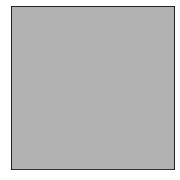

In [5]:
image_mean = images.float().mean(0) * 70

fig = plt.figure(figsize=(3, 3))
plt.imshow(image_mean.int())
plt.xticks([])
plt.yticks([])
plt.show()

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [6]:
from torch.autograd import Variable

a = torch.FloatTensor(2, 3, 4).uniform_().cuda()
b = torch.FloatTensor(1, 8, 3).uniform_().cuda()

c = b.view(a.shape)

c = Variable(c.cpu(), requires_grad=True)
a = Variable(a.cpu(), requires_grad=True)

L = torch.mean((c - a) ** 2)
L.backward()

c.grad

tensor([[[-0.0343,  0.0129,  0.0250, -0.0170],
         [ 0.0640, -0.0558,  0.0310, -0.0143],
         [-0.0396,  0.0090,  0.0410,  0.0113]],

        [[ 0.0152, -0.0430,  0.0221,  0.0524],
         [ 0.0025,  0.0025, -0.0269, -0.0534],
         [ 0.0054, -0.0179, -0.0002,  0.0248]]])